In [1]:
import math
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pylab
import sys
import utils
import keras
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

Using TensorFlow backend.


In [2]:
import LR2NBK_GP

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sys.setrecursionlimit(2000000)

# With Binary Data

In [5]:
X_train, y_train, X_test, y_test = utils.load_dataset("splice", "splice")

In [6]:
X_train.shape

(2539, 240)

In [7]:
np.unique(y_train)

array([0, 1, 2])

In [8]:
%%time
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB().fit(X_train, y_train)
print(np.average(NB.predict(X_train) == y_train))
print(np.average(NB.predict(X_test) == y_test))

0.9614021268215833
0.9652996845425867
CPU times: user 58.8 ms, sys: 95.3 ms, total: 154 ms
Wall time: 46.7 ms


In [9]:
clf = LogisticRegression(solver='lbfgs',
    C = 0.1,
    verbose=True,
    multi_class='multinomial',
    max_iter=2000, n_jobs=6).fit(X_train, y_train)

np.average(clf.predict(X_test) == y_test), np.average(clf.predict(X_train) == y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:    1.4s finished


(0.9652996845425867, 0.9810949192595511)

In [10]:
W = np.hstack((clf.intercept_[:,None], clf.coef_))

In [11]:
%%time
a = LR2NBK_GP.LR2NBK(W)
a.setObj(X_train, y_train, divider = 1, c = 1e-10)
a.solve(solver = 'mosek_cli', verbose=1)

Using solver 'mosek_cli'
Solving for 1443 variables.
Solving took 0.599 seconds.
CPU times: user 14.7 s, sys: 120 ms, total: 14.8 s
Wall time: 15.4 s


In [12]:
%%time
print( np.average(np.mean(a.classify(X_test) == y_test)), np.average(clf.predict(X_test) == y_test) )
print( np.average(np.mean(a.classify(X_train) == y_train)), np.average(clf.predict(X_train) == y_train) )

(0.9652996845425867, 0.9652996845425867)
(0.9810949192595511, 0.9810949192595511)
CPU times: user 172 ms, sys: 209 ms, total: 381 ms
Wall time: 80 ms


# Missing Data

In [13]:
X_test.shape

(634, 240)

In [14]:
%%time
setting = {
    "repeat": 1,
    "k": [i for i in range(0, 60, 2)],
    "prob" : True,
    "function": utils.conditional_likelihood_k,
    "discreteFeatures": 4
}
data_a2 = utils.run_experiment_k_paper(X_test, y_test, clf, NB, a, setting)

Using following function: 
<function conditional_likelihood_k at 0x7f2819ce9398>
Possible features to remove: 60
K = 0
	 R = 0
K = 2
	 R = 0
K = 4
	 R = 0
K = 6
	 R = 0
K = 8
	 R = 0
K = 10
	 R = 0
K = 12
	 R = 0
K = 14
	 R = 0
K = 16
	 R = 0
K = 18
	 R = 0
K = 20
	 R = 0
K = 22
	 R = 0
K = 24
	 R = 0
K = 26
	 R = 0
K = 28
	 R = 0
K = 30
	 R = 0
K = 32
	 R = 0
K = 34
	 R = 0
K = 36
	 R = 0
K = 38
	 R = 0
K = 40
	 R = 0
K = 42
	 R = 0
K = 44
	 R = 0
K = 46
	 R = 0
K = 48
	 R = 0
K = 50
	 R = 0
K = 52
	 R = 0
K = 54
	 R = 0
K = 56
	 R = 0
K = 58
	 R = 0
CPU times: user 12.7 s, sys: 12.3 s, total: 25 s
Wall time: 6.97 s


<module 'matplotlib.pyplot' from '/home/pasha/Desktop/ucla-lab/missing/gpkit2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

<Figure size 576x432 with 0 Axes>

/home/pasha/Desktop/ucla-lab/missing/gpkit2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


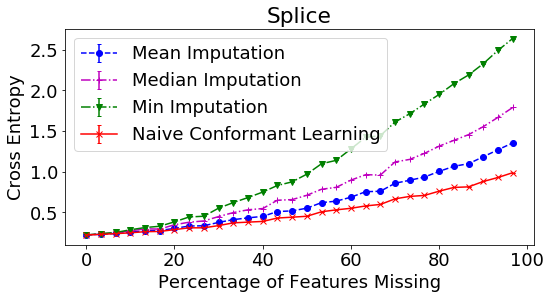

In [15]:
setting = {
    "show": ["min", "mean", "median", "ours"],
    "saveAs": "splice_cross.eps",
    "title": "Splice",
    "Ylabel": "Cross Entropy"
}
utils.plot_results_paper(data_a2, setting)

In [16]:
%%time
from sklearn.metrics import f1_score 

accuracy = lambda x,y: np.mean(x == y)
f1 = lambda x,y: f1_score(x,y.flatten(), average = "weighted")

setting = {
    "repeat": 3,
    "k": [i for i in range(0, 240, 2)],
    "prob" : False,
    "function": f1,
    "discreteFeatures": 4
}
data_a3 = utils.run_experiment_k_paper(X_test, y_test, clf, NB, a, setting)

Using following function: 
<function <lambda> at 0x7f27f5f65488>
Possible features to remove: 60
K = 0
	 R = 0
K = 2
	 R = 0
K = 4
	 R = 0
K = 6
	 R = 0
K = 8
	 R = 0
K = 10
	 R = 0
K = 12
	 R = 0
K = 14
	 R = 0
K = 16
	 R = 0
K = 18
	 R = 0
K = 20
	 R = 0
K = 22
	 R = 0
K = 24
	 R = 0
K = 26
	 R = 0
K = 28
	 R = 0
K = 30
	 R = 0
K = 32
	 R = 0
K = 34
	 R = 0
K = 36
	 R = 0
K = 38
	 R = 0
K = 40
	 R = 0
K = 42
	 R = 0
K = 44
	 R = 0
K = 46
	 R = 0
K = 48
	 R = 0


/home/pasha/Desktop/ucla-lab/missing/gpkit2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K = 50
	 R = 0
K = 52
	 R = 0
K = 54
	 R = 0
K = 56
	 R = 0
K = 58
	 R = 0
K = 60
	 R = 0
K = 62
Early stop: Only had 60 features possible to remove
CPU times: user 43.8 s, sys: 41 s, total: 1min 24s
Wall time: 24 s


<module 'matplotlib.pyplot' from '/home/pasha/Desktop/ucla-lab/missing/gpkit2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

<Figure size 576x432 with 0 Axes>

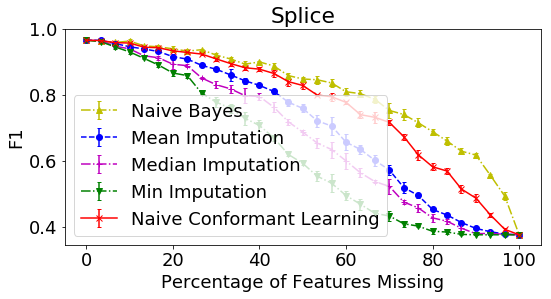

In [17]:
setting = {
    "show": ["nb", "min", "ours", "mean", "median"],
    "saveAs": "splice_accuracy.eps",
    "title": "Splice",
    "Ylabel": "F1"
}
utils.plot_results_paper(data_a3, setting)

In [18]:
utils.save("data_splice_result_cross.pickle", data_a2)
utils.save("data_splice_result_accuracy.pickle", data_a3)

# Table

In [19]:
%%time
from sklearn.metrics import f1_score 

accuracy = lambda x,y: np.mean(x == y)
f1 = lambda x,y: f1_score(x,y.flatten(), average = "weighted")

N = W.shape[1]
setting = {
    "repeat": 100,
    "k": [i for i in range(0, N+1, int(0.2/4*N))],
    "prob" : False,
    "function": f1, #utils.conditional_likelihood_k,
    "discreteFeatures": 4
}
data_for_table = utils.run_experiment_k_paper(X_test, y_test, clf, NB, a, setting)

Using following function: 
<function <lambda> at 0x7f2805427488>
Possible features to remove: 60
K = 0
	 R = 0
	 R = 10
	 R = 20
K = 12
	 R = 0
	 R = 10
	 R = 20
K = 24
	 R = 0
	 R = 10
	 R = 20
K = 36
	 R = 0
	 R = 10
	 R = 20
K = 48
	 R = 0
	 R = 10
	 R = 20
K = 60
	 R = 0
	 R = 10
	 R = 20
K = 72
Early stop: Only had 60 features possible to remove
CPU times: user 1min 23s, sys: 1min 16s, total: 2min 40s
Wall time: 42.4 s


In [24]:
row = []
for method in ["min", "max", "mean", "median", "ours"]:
    temp = []
    for k in range(1, 5):
        m = np.mean(100*data_for_table[method][k])
        s = np.std(100*data_for_table[method][k])
        temp.append(np.round(m, 1))
        print(method, k*20, m, s)
        
    row.append(temp)

row = np.array(row)  
bold = np.argmax(row, axis=0)
print("")
for i in range(len(row)):
    line = ""
    for j in range(len(row[i])):
        if bold[j] == i or row[i][j] == row[bold[j]][j]:
            line += "\\textbf{" + str(row[i][j]) + "}"
        else:
            line += str(row[i][j])
        
        line += " & "
    print(line)
    

('min', 20, 86.88872901794151, 1.1196057822124665)
('min', 40, 69.82428568709808, 1.7845485391165032)
('min', 60, 49.15344527088307, 2.0044991206445726)
('min', 80, 38.77915143580157, 0.6732263116660888)
('max', 20, 86.87214602965703, 1.1283654855722818)
('max', 40, 69.7743254855895, 1.7989837053021938)
('max', 60, 49.077839741020625, 1.981737771413272)
('max', 80, 38.767418274415455, 0.690010127408485)
('mean', 20, 91.82140368209201, 0.9955245697825975)
('mean', 40, 82.30824214880091, 1.398264453816046)
('mean', 60, 66.24537383190976, 1.8760453646580086)
('mean', 80, 45.738014779143995, 1.2045303308801798)
('median', 20, 89.41115846695213, 0.914799150977075)
('median', 40, 77.58591754517829, 1.6459577351997834)
('median', 60, 59.450523572177715, 2.504463212338077)
('median', 80, 42.51776841020183, 1.071837503467449)
('ours', 20, 93.33052186380898, 0.8880598834651742)
('ours', 40, 87.19708148538385, 1.2865804571987292)
('ours', 60, 76.61800076506688, 1.5112755944303422)
('ours', 80, 59